In [6]:
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json

In [ ]:
# Make sure to install pygeos first!! If you don't this can cause trouble with dependencies and
# the spatial merge may not complete

import sys
!{sys.executable} -m pip install pygeos

In [ ]:
# Installing geopandas

import sys
!{sys.executable} -m pip install geopandas

In [3]:
# Download at: https://docs.digital.mass.gov/dataset/massgis-data-datalayers-2010-us-census

MA_df = gpd.read_file("CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010TRACTS_POLY.shp")
MA_df

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((240678.759 886748.073, 240607.995 88..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((240969.666 890122.806, 240985.156 89..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((242328.221 890545.050, 242276.888 89..."
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,191.1397,3377,1676,0141882,123774,0003693,0123774,7.735182e+05,4540.296101,"POLYGON ((240372.666 888331.030, 240393.057 88..."
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,325.2812,4280,1987,0141874,123766,0003691,0123766,1.316372e+06,5854.497366,"POLYGON ((240687.299 888298.408, 240700.449 88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,1355.2791,2149,809,0189917,171462,0004065,0171462,5.484642e+06,9858.734830,"POLYGON ((182231.394 921599.665, 182405.418 92..."
1468,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,1504.8969,5670,2488,0189919,171464,0004066,0171464,6.090126e+06,11906.751110,"POLYGON ((181045.532 923444.745, 181902.923 92..."
1469,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,782.4305,3665,1557,0190133,171678,0004114,0171678,3.166396e+06,9559.778037,"POLYGON ((174482.678 891951.535, 174407.978 89..."
1470,25,027,710800,25027710800,7108,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,577.4996,4539,1940,0189967,171512,0004077,0171512,2.337067e+06,9574.497510,"POLYGON ((176303.717 926403.339, 176284.512 92..."


<AxesSubplot:>

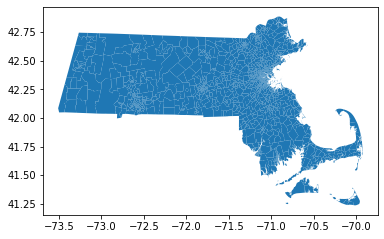

In [13]:
MA_df.plot()

In [4]:
# Converting the shapefile's coordinate system to lat/long

MA_df = MA_df.to_crs("EPSG:4326")
MA_df

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((-71.00721 42.23013, -71.00807 42.229..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((-71.00345 42.26050, -71.00326 42.260..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((-70.98695 42.26423, -70.98758 42.263..."
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,191.1397,3377,1676,0141882,123774,0003693,0123774,7.735182e+05,4540.296101,"POLYGON ((-71.01081 42.24440, -71.01056 42.244..."
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,325.2812,4280,1987,0141874,123766,0003691,0123766,1.316372e+06,5854.497366,"POLYGON ((-71.00700 42.24409, -71.00684 42.244..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,1355.2791,2149,809,0189917,171462,0004065,0171462,5.484642e+06,9858.734830,"POLYGON ((-71.71632 42.54475, -71.71419 42.540..."
1468,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,1504.8969,5670,2488,0189919,171464,0004066,0171464,6.090126e+06,11906.751110,"POLYGON ((-71.73082 42.56133, -71.72035 42.552..."
1469,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,782.4305,3665,1557,0190133,171678,0004114,0171678,3.166396e+06,9559.778037,"POLYGON ((-71.80935 42.27762, -71.81025 42.276..."
1470,25,027,710800,25027710800,7108,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,577.4996,4539,1940,0189967,171512,0004077,0171512,2.337067e+06,9574.497510,"POLYGON ((-71.78869 42.58783, -71.78892 42.587..."


In [7]:
# Geocoding your addresses using Google's geocoder - up to 40,000 queires are free per month.

street_address = '4 S Market St'
city = 'Boston'

Google_query = "https://maps.googleapis.com/maps/api/geocode/json?address="+street_address+", "+city+" MA&key=YOUR_KEY"
Google_request = requests.get(Google_query)
Google_JSON = Google_request.json()

Google_coordinates = Google_JSON['results'][0]['geometry']['location']
lat = Google_coordinates['lat']
lon = Google_coordinates['lng']

print("Latitude: ", lat)
print("Longitude: ", lon)



Latitude:  42.360129
Longitude:  -71.0549386


In [8]:
# Declaring a sample location object
location_df = pd.DataFrame(
    {'Place': ['Newbury Trader Joe', 'Boston theater district', 'Faneuil Hall'],
     'Latitude': [42.348321, 42.354087, 42.360129],
     'Longitude': [-71.084000, -71.063224, -71.0549386]})

location_df

,Place,Latitude,Longitude
0,Newbury Trader Joe,42.348321,-71.084000
1,Boston theater district,42.354087,-71.063224
2,Faneuil Hall,42.360129,-71.054939


In [9]:
# Converting the above location dataframe into a Shapely object

gdf = gpd.GeoDataFrame(
    location_df, geometry=gpd.points_from_xy(location_df.Longitude, location_df.Latitude))
gdf

,Place,Latitude,Longitude,geometry
0,Newbury Trader Joe,42.348321,-71.084000,POINT (-71.08400 42.34832)
1,Boston theater district,42.354087,-71.063224,POINT (-71.06322 42.35409)
2,Faneuil Hall,42.360129,-71.054939,POINT (-71.05494 42.36013)


In [10]:
# Completing the merge to output the addresses merged with the particular census tracts

Spatial_merge_df = sjoin(gdf, MA_df, how='left', op='within')

Spatial_merge_df

<ipython-input-10-99199de8b8a0>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  Spatial_merge_df = sjoin(gdf, MA_df, how='left', op='within')


,Place,Latitude,Longitude,geometry,index_right,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,Newbury Trader Joe,42.348321,-71.084000,POINT (-71.08400 42.34832),929,25,025,010701,25025010701,107.01,...,2177562.16,49.9899,2478,1599,0174950,147940,0003870,0147940,2.023030e+05,2102.496117
1,Boston theater district,42.354087,-71.063224,POINT (-71.06322 42.35409),1090,25,025,070101,25025070101,701.01,...,10969123.93,251.8164,5902,3383,0175109,148099,0003912,0148099,1.019069e+06,5204.651150
2,Faneuil Hall,42.360129,-71.054939,POINT (-71.05494 42.36013),915,25,025,030300,25025030300,303,...,7441425.20,170.8316,4872,2960,0174989,147979,0003881,0147979,6.913338e+05,6659.995788


In [11]:
# Write to a CSV

Spatial_merge_df.to_csv("Spatial_merge.csv", encoding = "utf-8")